In [2]:
# !unzip /content/utility.zip

**The Notebook contains the code for Building Neural Network with the MNIST data Target of architecture: To Design a network with help of Batch-Norm leading to less than 50000 parameters achieving the desired accuracy of atleast 70% within 20Epochs.**

Description:This network has been made with 45K parameters which makes it a heavier model.The Receptive Field looks out a 58 with Convolutions.

EPOCHS: Iterated the dataset for 20 times.

BATCHSIZE :256

In [3]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from utility.dataset import loader # input batch-size & transforms if u create else proivde 'custom'
from utility.run import Performance,scores
from utility.visualize import Plots,plot_metrics
from models.model1 import NetArch,return_summary
from utility.utils import allot_device

In [5]:
import torch
from torchvision.transforms import transforms
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [6]:
 # Setting up the device
device = allot_device(42)
print(f"{device} is available")

cuda is available


In [7]:
train_loader,test_loader = loader.load_data(256)
print(len(train_loader),len(test_loader))

/usr/local/lib/python3.10/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


100%|██████████| 170498071/170498071 [00:10<00:00, 15947559.66it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
196 40


<Figure size 640x480 with 0 Axes>

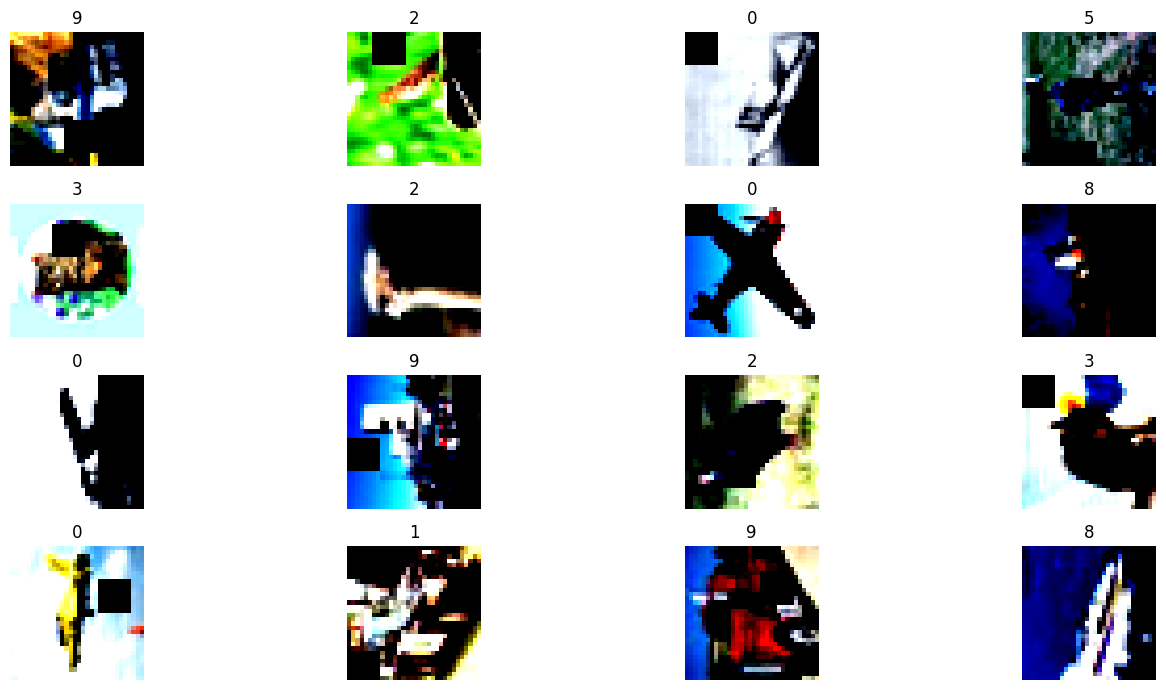

In [18]:
#train_data
Plots(None,17,train_loader).plot_images()

<Figure size 640x480 with 0 Axes>

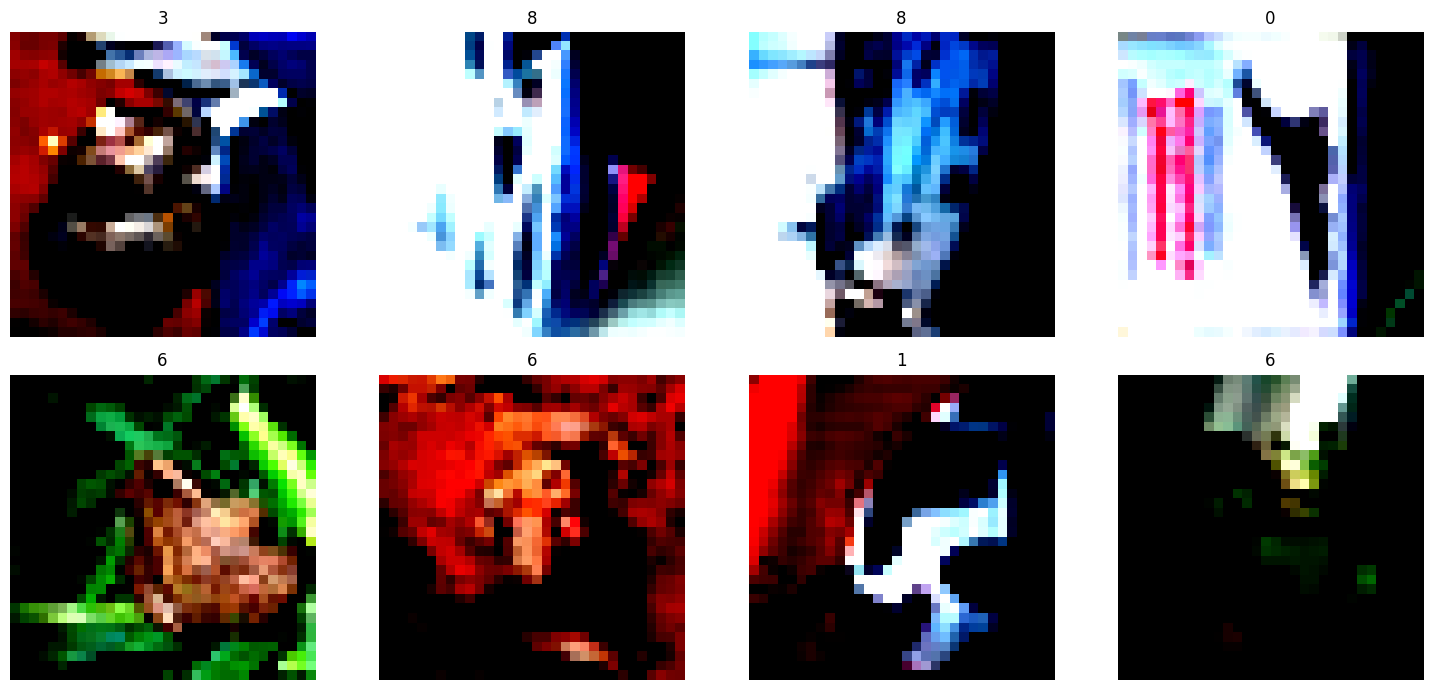

In [20]:
#test_data
Plots(None,9,test_loader).plot_images()

In [8]:
model = NetArch().to(device)

In [10]:
return_summary(model,device,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 20, 32, 32]             320
              ReLU-8           [-1, 20, 32, 32]               0
         MaxPool2d-9           [-1, 20, 16, 16]               0
           Conv2d-10           [-1, 20, 16, 16]           3,600
      BatchNorm2d-11           [-1, 20, 16, 16]              40
             ReLU-12           [-1, 20, 16, 16]               0
           Conv2d-13           [-1, 20, 16, 16]           3,600
      BatchNorm2d-14           [-1, 20,

In [11]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20
perf = Performance(device,model,(train_loader,test_loader),optimizer,criterion)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  perf.train()
  perf.test()
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=1.2345 Batch_id=195 Accuracy=37.90: 100%|██████████| 196/196 [00:17<00:00, 10.93it/s]


Test set: Average loss: 0.0062, Accuracy: 4342/10000 (43.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=1.1845 Batch_id=195 Accuracy=55.41: 100%|██████████| 196/196 [00:17<00:00, 11.08it/s]


Test set: Average loss: 0.0053, Accuracy: 5346/10000 (53.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=1.2410 Batch_id=195 Accuracy=62.55: 100%|██████████| 196/196 [00:21<00:00,  9.09it/s]


Test set: Average loss: 0.0056, Accuracy: 5246/10000 (52.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=1.1038 Batch_id=195 Accuracy=66.65: 100%|██████████| 196/196 [00:18<00:00, 10.88it/s]


Test set: Average loss: 0.0050, Accuracy: 5731/10000 (57.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.7643 Batch_id=195 Accuracy=69.43: 100%|██████████| 196/196 [00:17<00:00, 11.35it/s]


Test set: Average loss: 0.0040, Accuracy: 6420/10000 (64.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 6


Train: Loss=0.8122 Batch_id=195 Accuracy=73.58: 100%|██████████| 196/196 [00:17<00:00, 11.28it/s]


Test set: Average loss: 0.0029, Accuracy: 7460/10000 (74.60%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 7


Train: Loss=0.8822 Batch_id=195 Accuracy=74.40: 100%|██████████| 196/196 [00:17<00:00, 11.12it/s]


Test set: Average loss: 0.0029, Accuracy: 7510/10000 (75.10%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 8


Train: Loss=0.7510 Batch_id=195 Accuracy=74.97: 100%|██████████| 196/196 [00:17<00:00, 11.18it/s]


Test set: Average loss: 0.0029, Accuracy: 7428/10000 (74.28%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 9


Train: Loss=0.7372 Batch_id=195 Accuracy=75.08: 100%|██████████| 196/196 [00:17<00:00, 11.45it/s]


Test set: Average loss: 0.0028, Accuracy: 7516/10000 (75.16%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 10


Train: Loss=0.6018 Batch_id=195 Accuracy=75.58: 100%|██████████| 196/196 [00:17<00:00, 11.06it/s]


Test set: Average loss: 0.0030, Accuracy: 7357/10000 (73.57%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 11


Train: Loss=0.6521 Batch_id=195 Accuracy=75.95: 100%|██████████| 196/196 [00:17<00:00, 11.37it/s]


Test set: Average loss: 0.0028, Accuracy: 7597/10000 (75.97%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 12


Train: Loss=0.6723 Batch_id=195 Accuracy=75.92: 100%|██████████| 196/196 [00:17<00:00, 11.46it/s]


Test set: Average loss: 0.0027, Accuracy: 7632/10000 (76.32%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 13


Train: Loss=0.6956 Batch_id=195 Accuracy=75.98: 100%|██████████| 196/196 [00:17<00:00, 10.93it/s]


Test set: Average loss: 0.0027, Accuracy: 7609/10000 (76.09%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 14


Train: Loss=0.6739 Batch_id=195 Accuracy=76.03: 100%|██████████| 196/196 [00:17<00:00, 11.30it/s]


Test set: Average loss: 0.0027, Accuracy: 7621/10000 (76.21%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 15


Train: Loss=0.8790 Batch_id=195 Accuracy=76.18: 100%|██████████| 196/196 [00:17<00:00, 11.37it/s]


Test set: Average loss: 0.0027, Accuracy: 7629/10000 (76.29%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 16


Train: Loss=0.7119 Batch_id=195 Accuracy=76.24: 100%|██████████| 196/196 [00:17<00:00, 10.97it/s]


Test set: Average loss: 0.0027, Accuracy: 7635/10000 (76.35%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 17


Train: Loss=0.6375 Batch_id=195 Accuracy=76.21: 100%|██████████| 196/196 [00:17<00:00, 11.38it/s]


Test set: Average loss: 0.0027, Accuracy: 7624/10000 (76.24%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 18


Train: Loss=0.9101 Batch_id=195 Accuracy=76.11: 100%|██████████| 196/196 [00:17<00:00, 11.20it/s]


Test set: Average loss: 0.0027, Accuracy: 7635/10000 (76.35%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 19


Train: Loss=0.6679 Batch_id=195 Accuracy=76.04: 100%|██████████| 196/196 [00:17<00:00, 10.94it/s]


Test set: Average loss: 0.0027, Accuracy: 7619/10000 (76.19%)

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch 20


Train: Loss=0.7082 Batch_id=195 Accuracy=76.31: 100%|██████████| 196/196 [00:20<00:00,  9.75it/s]


Test set: Average loss: 0.0027, Accuracy: 7627/10000 (76.27%)

Adjusting learning rate of group 0 to 1.0000e-06.


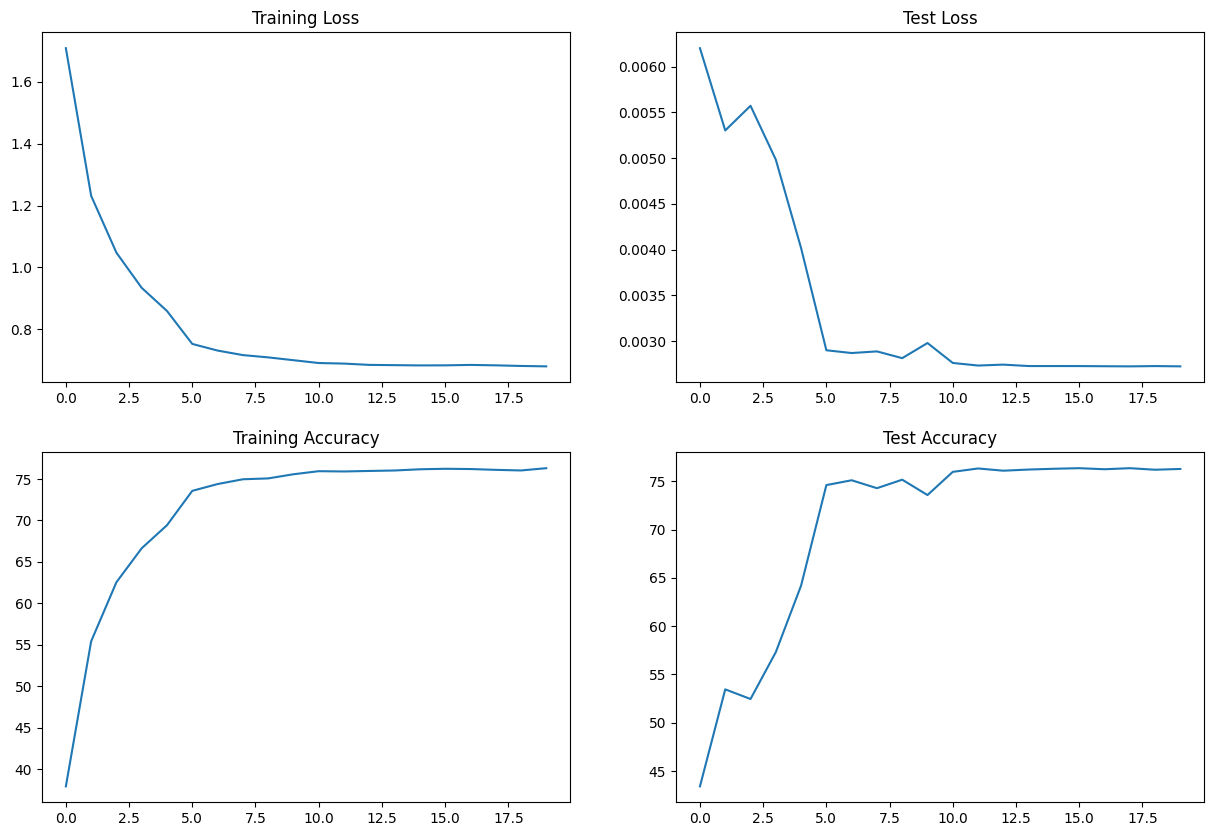

In [12]:
metrics = scores()
plot_metrics(metrics)

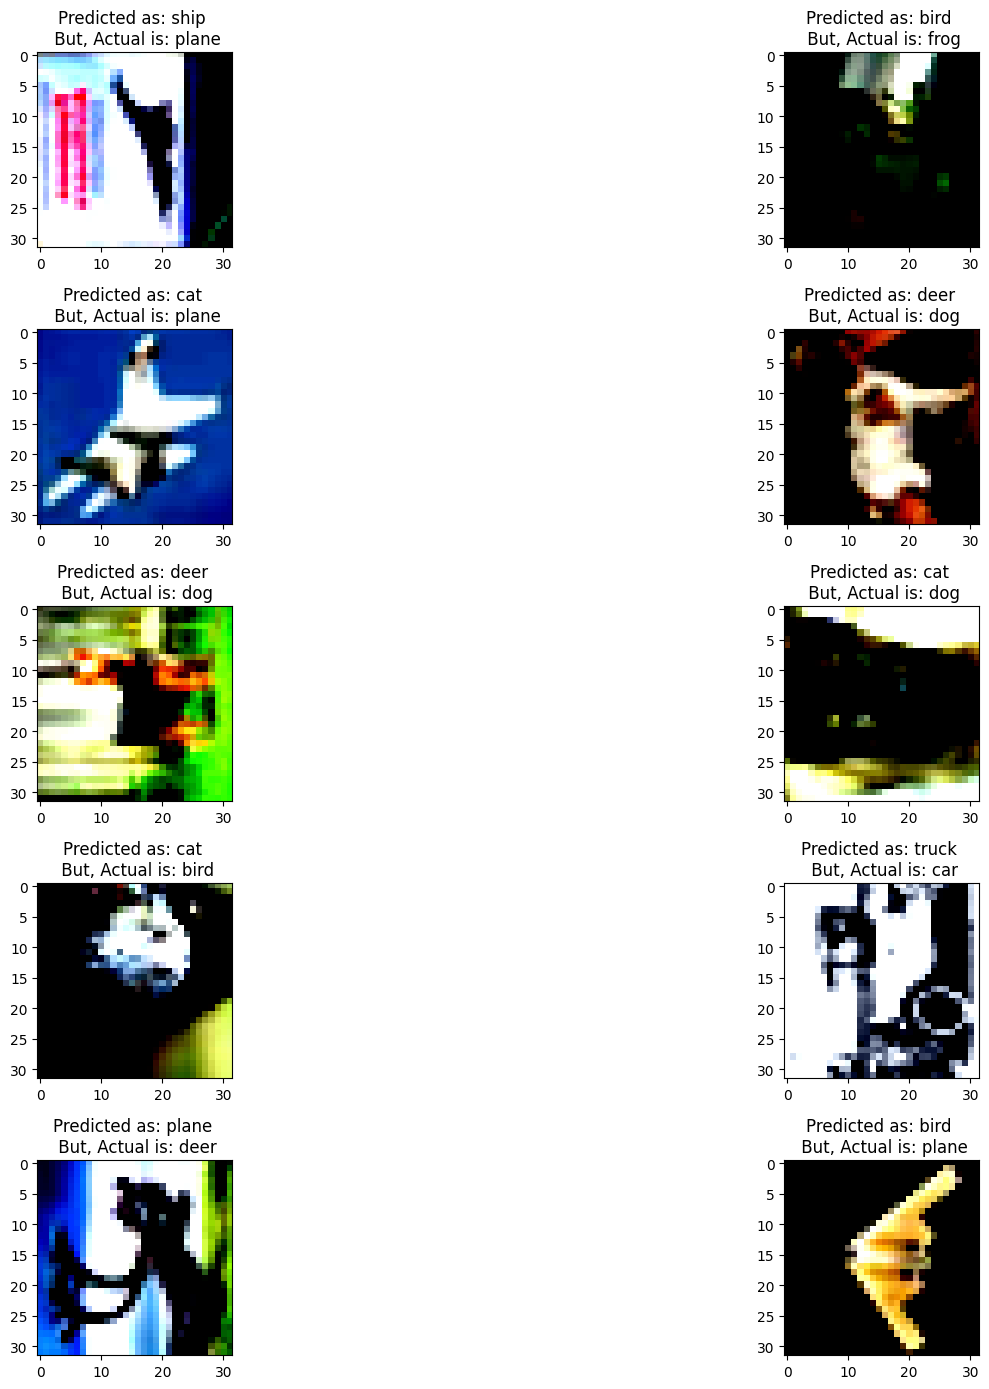

In [14]:
Plots((model,test_loader,device,10)).mis_classified()

In [15]:
print("Batch Norm is Done!")

Batch Norm is Done!
